In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [4]:
def calcular_amortizacion_frances(principal, tasa_interes_anual, num_cuotas):
    """
    Calcula la amortización de un préstamo utilizando el método francés.

    Parámetros:
    - principal: Monto total del préstamo.
    - tasa_interes_anual: Tasa de interés anual (en formato decimal, por ejemplo, 5% = 0.05).
    - num_cuotas: Número total de cuotas a pagar.

    Retorna:
    - DataFrame: Un DataFrame de pandas con la información de cada cuota.
    """
    # Calcular la tasa de interés mensual
    tasa_interes_mensual = tasa_interes_anual / 12
    
    # Calcular la cuota constante (C)
    cuota = (principal * tasa_interes_mensual) / (1 - (1 + tasa_interes_mensual) ** -num_cuotas)
    
    # Inicializar lista para almacenar los resultados
    resultados = []
    
    # Inicializar saldo
    saldo = principal
    
    for i in range(1, num_cuotas + 1):
        # Calcular el interés del saldo actual
        interes = saldo * tasa_interes_mensual
        
        # Calcular la amortización del capital
        amortizacion_capital = cuota - interes
        
        # Actualizar el saldo restante
        saldo -= amortizacion_capital
        
        # Guardar los resultados en una lista
        resultados.append({
            'Cuota': i,
            'Interés': round(interes, 2),
            'Amortización Capital': round(amortizacion_capital, 2),
            'Cuota Total': round(cuota, 2),
            'Saldo Restante': round(saldo, 2)
        })
    
    # Crear un DataFrame a partir de la lista de resultados
    df_amortizacion = pd.DataFrame(resultados)
    
    return df_amortizacion

In [9]:
monto_prestamo = 55000 # Monto del préstamo
tasa_interes = 9.5/100  # Tasa de interés anual (5%)
cuotas = 180  # Número de cuotas

df_resultados = calcular_amortizacion_frances(monto_prestamo, tasa_interes, cuotas)

In [10]:
df_resultados

,Cuota,Interés,Amortización Capital,Cuota Total,Saldo Restante
0,1,435.42,138.91,574.32,54861.09
1,2,434.32,140.01,574.32,54721.09
2,3,433.21,141.11,574.32,54579.97
3,4,432.09,142.23,574.32,54437.74
4,5,430.97,143.36,574.32,54294.38
...,...,...,...,...,...
175,176,22.20,552.12,574.32,2252.54
176,177,17.83,556.49,574.32,1696.05
177,178,13.43,560.90,574.32,1135.15
178,179,8.99,565.34,574.32,569.81


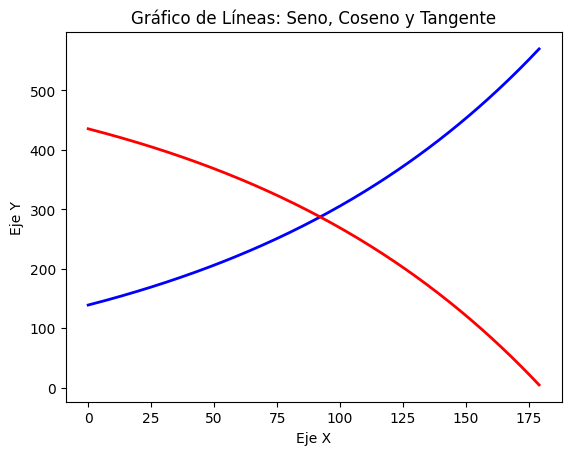

In [15]:
import matplotlib.pyplot as plt
plt.plot(df_resultados.index, df_resultados['Amortización Capital'], label='Amortizacion', color='blue', linewidth=2)
plt.plot(df_resultados.index, df_resultados['Interés'], label='Interes', color='red', linewidth=2)
plt.title('Gráfico de Líneas: Seno, Coseno y Tangente')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()